In [4]:
!pip3 install ipywidgets

    100% |████████████████████████████████| 71kB 2.2MB/s 
    100% |████████████████████████████████| 163kB 3.6MB/s 
    100% |████████████████████████████████| 81kB 4.3MB/s 
    100% |████████████████████████████████| 747kB 1.1MB/s 
    100% |████████████████████████████████| 112kB 5.6MB/s 
    100% |████████████████████████████████| 2.2MB 561kB/s 
    100% |████████████████████████████████| 133kB 477kB/s 
  Using cached six-1.11.0-py2.py3-none-any.whl
  Using cached Pygments-2.2.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 491kB 2.2MB/s 
    100% |████████████████████████████████| 61kB 9.8MB/s 
    100% |████████████████████████████████| 256kB 5.0MB/s 
    100% |████████████████████████████████| 256kB 4.0MB/s 
    100% |████████████████████████████████| 92kB 6.1MB/s 
    100% |████████████████████████████████| 491kB 1.6MB/s 
    100% |████████████████████████████████| 8.0MB 208kB/s 
    100% |████████████████████████████████| 92kB 4.6MB/s 
    100% |████████████

Text(value='', description='Domain to ping')

<IPython.core.display.Javascript object>


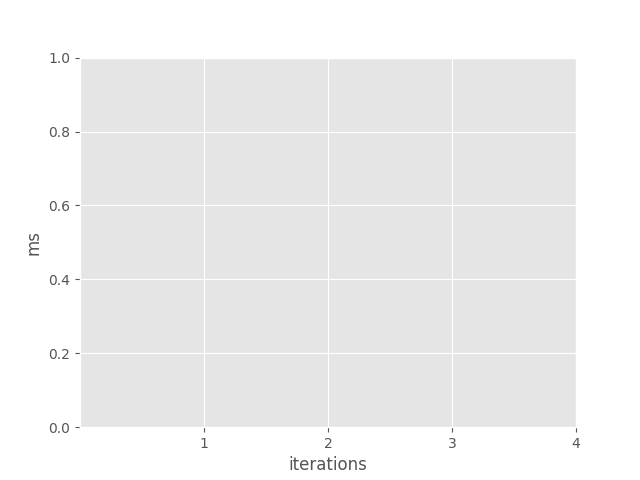

HBox()

Domain gave error on pinging
Domain gave error on pinging


AttributeError: 'list' object has no attribute 'astype'

AttributeError: 'list' object has no attribute 'astype'

Domain gave error on pinging


In [3]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()